In [103]:
# solution day 3

In [104]:
import pandas as pd
import numpy as np
import random

In [105]:
df = pd.read_csv('Hotel-A-train.csv')
validation_df = pd.read_csv('Hotel-A-validation.csv')

test_df = pd.read_csv('Hotel-A-test.csv')

In [106]:
df.head(4)

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,39428300,F,40,Latino,Grad,<25K,North,City Hotel,7/1/2015,7/2/2015,...,BB,No,No,No Deposit,Online,Yes,Check-In,Yes,10,218
1,77491756,F,49,Latino,Mid-School,50K -- 100K,East,City Hotel,7/1/2015,7/2/2015,...,BB,No,No,Refundable,Online,Yes,Check-In,No,0,185
2,73747291,F,42,caucasian,Grad,<25K,East,City Hotel,7/2/2015,7/6/2015,...,BB,No,No,No Deposit,Online,Yes,Check-In,No,0,119
3,67301739,M,25,African American,College,>100K,South,Airport Hotels,7/2/2015,7/3/2015,...,BB,No,No,Refundable,Agent,Yes,Check-In,Yes,5,144


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27499 entries, 0 to 27498
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Reservation-id          27499 non-null  int64 
 1   Gender                  27499 non-null  object
 2   Age                     27499 non-null  int64 
 3   Ethnicity               27499 non-null  object
 4   Educational_Level       27499 non-null  object
 5   Income                  27499 non-null  object
 6   Country_region          27499 non-null  object
 7   Hotel_Type              27499 non-null  object
 8   Expected_checkin        27499 non-null  object
 9   Expected_checkout       27499 non-null  object
 10  Booking_date            27499 non-null  object
 11  Adults                  27499 non-null  int64 
 12  Children                27499 non-null  int64 
 13  Babies                  27499 non-null  int64 
 14  Meal_Type               27499 non-null  object
 15  Vi

In [108]:
df.shape

(27499, 24)

In [109]:
df.isnull().sum()

Reservation-id            0
Gender                    0
Age                       0
Ethnicity                 0
Educational_Level         0
Income                    0
Country_region            0
Hotel_Type                0
Expected_checkin          0
Expected_checkout         0
Booking_date              0
Adults                    0
Children                  0
Babies                    0
Meal_Type                 0
Visted_Previously         0
Previous_Cancellations    0
Deposit_type              0
Booking_channel           0
Required_Car_Parking      0
Reservation_Status        0
Use_Promotion             0
Discount_Rate             0
Room_Rate                 0
dtype: int64

## pre-processing

In [110]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

## for the train set
df['Ethnicity'] = label_encoder.fit_transform(df['Ethnicity'])
df['Educational_Level'] = label_encoder.fit_transform(df['Educational_Level'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Country_region'] = label_encoder.fit_transform(df['Country_region'])
df['Hotel_Type'] = label_encoder.fit_transform(df['Hotel_Type'])
df['Meal_Type'] = label_encoder.fit_transform(df['Meal_Type'])
df['Visted_Previously'] = label_encoder.fit_transform(df['Visted_Previously'])
df['Previous_Cancellations'] = label_encoder.fit_transform(df['Previous_Cancellations'])
df['Deposit_type'] = label_encoder.fit_transform(df['Deposit_type'])
df['Booking_channel'] = label_encoder.fit_transform(df['Booking_channel'])
df['Required_Car_Parking'] = label_encoder.fit_transform(df['Required_Car_Parking'])
df['Use_Promotion'] = label_encoder.fit_transform(df['Use_Promotion'])
df['Income'] = label_encoder.fit_transform(df['Income'])

## for the validation set
validation_df['Ethnicity'] = label_encoder.fit_transform(validation_df['Ethnicity'])
validation_df['Educational_Level'] = label_encoder.fit_transform(validation_df['Educational_Level'])
validation_df['Gender'] = label_encoder.fit_transform(validation_df['Gender'])
validation_df['Country_region'] = label_encoder.fit_transform(validation_df['Country_region'])
validation_df['Hotel_Type'] = label_encoder.fit_transform(validation_df['Hotel_Type'])
validation_df['Meal_Type'] = label_encoder.fit_transform(validation_df['Meal_Type'])
validation_df['Visted_Previously'] = label_encoder.fit_transform(validation_df['Visted_Previously'])
validation_df['Previous_Cancellations'] = label_encoder.fit_transform(validation_df['Previous_Cancellations'])
validation_df['Deposit_type'] = label_encoder.fit_transform(validation_df['Deposit_type'])
validation_df['Booking_channel'] = label_encoder.fit_transform(validation_df['Booking_channel'])
validation_df['Required_Car_Parking'] = label_encoder.fit_transform(validation_df['Required_Car_Parking'])
validation_df['Use_Promotion'] = label_encoder.fit_transform(validation_df['Use_Promotion'])
validation_df['Income'] = label_encoder.fit_transform(validation_df['Income'])

## for the test set
test_df['Ethnicity'] = label_encoder.fit_transform(test_df['Ethnicity'])
test_df['Educational_Level'] = label_encoder.fit_transform(test_df['Educational_Level'])
test_df['Gender'] = label_encoder.fit_transform(test_df['Gender'])
test_df['Country_region'] = label_encoder.fit_transform(test_df['Country_region'])
test_df['Hotel_Type'] = label_encoder.fit_transform(test_df['Hotel_Type'])
test_df['Meal_Type'] = label_encoder.fit_transform(test_df['Meal_Type'])
test_df['Visted_Previously'] = label_encoder.fit_transform(test_df['Visted_Previously'])
test_df['Previous_Cancellations'] = label_encoder.fit_transform(test_df['Previous_Cancellations'])
test_df['Deposit_type'] = label_encoder.fit_transform(test_df['Deposit_type'])
test_df['Booking_channel'] = label_encoder.fit_transform(test_df['Booking_channel'])
test_df['Required_Car_Parking'] = label_encoder.fit_transform(test_df['Required_Car_Parking'])
test_df['Use_Promotion'] = label_encoder.fit_transform(test_df['Use_Promotion'])
test_df['Income'] = label_encoder.fit_transform(test_df['Income'])

In [111]:
df.dtypes

Reservation-id             int64
Gender                     int64
Age                        int64
Ethnicity                  int64
Educational_Level          int64
Income                     int64
Country_region             int64
Hotel_Type                 int64
Expected_checkin          object
Expected_checkout         object
Booking_date              object
Adults                     int64
Children                   int64
Babies                     int64
Meal_Type                  int64
Visted_Previously          int64
Previous_Cancellations     int64
Deposit_type               int64
Booking_channel            int64
Required_Car_Parking       int64
Reservation_Status        object
Use_Promotion              int64
Discount_Rate              int64
Room_Rate                  int64
dtype: object

In [112]:
## for the train set
df['Reservation-id'] = df['Reservation-id'].astype('object')
df['Gender'] = df['Gender'].astype('object')
df['Ethnicity'] = df['Ethnicity'].astype('object')
df['Educational_Level'] = df['Educational_Level'].astype('object')
df['Income'] = df['Income'].astype('object')
df['Country_region'] = df['Country_region'].astype('object')
df['Hotel_Type'] = df['Hotel_Type'].astype('object')
df['Meal_Type'] = df['Meal_Type'].astype('object')
df['Visted_Previously'] = df['Visted_Previously'].astype('object')
df['Previous_Cancellations'] = df['Previous_Cancellations'].astype('object')
df['Deposit_type'] = df['Deposit_type'].astype('object')
df['Booking_channel'] = df['Booking_channel'].astype('object')
df['Required_Car_Parking'] = df['Required_Car_Parking'].astype('object')
df['Use_Promotion'] = df['Use_Promotion'].astype('object')

## for the validation set
validation_df['Reservation-id'] = validation_df['Reservation-id'].astype('object')
validation_df['Gender'] = validation_df['Gender'].astype('object')
validation_df['Ethnicity'] = validation_df['Ethnicity'].astype('object')
validation_df['Educational_Level'] = validation_df['Educational_Level'].astype('object')
validation_df['Income'] = validation_df['Income'].astype('object')
validation_df['Country_region'] = validation_df['Country_region'].astype('object')
validation_df['Hotel_Type'] = validation_df['Hotel_Type'].astype('object')
validation_df['Meal_Type'] = validation_df['Meal_Type'].astype('object')
validation_df['Visted_Previously'] = validation_df['Visted_Previously'].astype('object')
validation_df['Previous_Cancellations'] = validation_df['Previous_Cancellations'].astype('object')
validation_df['Deposit_type'] = validation_df['Deposit_type'].astype('object')
validation_df['Booking_channel'] = validation_df['Booking_channel'].astype('object')
validation_df['Required_Car_Parking'] = validation_df['Required_Car_Parking'].astype('object')
validation_df['Use_Promotion'] = validation_df['Use_Promotion'].astype('object')

## for the test set
test_df['Reservation-id'] = test_df['Reservation-id'].astype('object')
test_df['Gender'] = test_df['Gender'].astype('object')
test_df['Ethnicity'] = test_df['Ethnicity'].astype('object')
test_df['Educational_Level'] = test_df['Educational_Level'].astype('object')
test_df['Income'] = test_df['Income'].astype('object')
test_df['Country_region'] = test_df['Country_region'].astype('object')
test_df['Hotel_Type'] = test_df['Hotel_Type'].astype('object')
test_df['Meal_Type'] = df['Meal_Type'].astype('object')
test_df['Visted_Previously'] = test_df['Visted_Previously'].astype('object')
test_df['Previous_Cancellations'] = test_df['Previous_Cancellations'].astype('object')
test_df['Deposit_type'] = test_df['Deposit_type'].astype('object')
test_df['Booking_channel'] = test_df['Booking_channel'].astype('object')
test_df['Required_Car_Parking'] = test_df['Required_Car_Parking'].astype('object')
test_df['Use_Promotion'] = test_df['Use_Promotion'].astype('object')

In [113]:
from datetime import date
initial_date=date(2010, 1, 1)

def modify_date(dataframe, col):
    for row in range(dataframe.shape[0]):
        date_str = dataframe[col][row]
        date_arr = ([int(x) for x in date_str.split("/")] )
        date_diff = (date(date_arr[2], date_arr[0], date_arr[1])-initial_date).days
        dataframe[col][row] = date_diff / 5000

        
        
# for train set
modify_date(df, 'Booking_date')
modify_date(df, 'Expected_checkin')
modify_date(df, 'Expected_checkout')
# for validation set
modify_date(validation_df, 'Booking_date')
modify_date(validation_df, 'Expected_checkin')
modify_date(validation_df, 'Expected_checkout')
# for test set
modify_date(test_df, 'Booking_date')
modify_date(test_df, 'Expected_checkin')
modify_date(test_df, 'Expected_checkout')

/home/rusiru/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


#### create new features

In [114]:
df['diff_check_in_out'] =  df['Expected_checkout'] - df['Expected_checkin']
validation_df['diff_check_in_out'] =  validation_df['Expected_checkout'] - validation_df['Expected_checkin']
test_df['diff_check_in_out'] =  test_df['Expected_checkout'] - test_df['Expected_checkin']

In [115]:
df.head(3)

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate,diff_check_in_out
0,39428300,0,40,2,1,2,1,1,0.4014,0.4016,...,0,0,0,2,1,Check-In,1,10,218,0.0002
1,77491756,0,49,2,3,1,0,1,0.4014,0.4016,...,0,0,2,2,1,Check-In,0,0,185,0.0002
2,73747291,0,42,3,1,2,0,1,0.4016,0.4024,...,0,0,0,2,1,Check-In,0,0,119,0.0008


### Output modification

In [116]:
def output_modification(dataframe, output):
    val = 0
    for row in range(dataframe.shape[0]):
        if dataframe[output][row] == "Check-In":
            val = 1
        elif dataframe[output][row] == "Canceled":
            val = 2
        elif dataframe[output][row] == "No-Show":
            val = 3
        else:
            print(dataframe[output][row])
            print("Something went wrong! Don't proceed!")
            break
        dataframe[output][row] = val

        
        
# for train set
output_modification(df, 'Reservation_Status')
# for validation set
output_modification(validation_df, 'Reservation_Status')

/home/rusiru/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [117]:
ones, twos, threes, unwanted = 0, 0, 0, 0
for i in df['Reservation_Status']:
    if(i==1):
        ones +=1
    elif(i==2):
        twos += 1
    elif(i==3):
        threes += 1
    else:
        unwanted += 1
        
print("No. of Ones     : ", ones)
print("No. of Twos     : ", twos)
print("No. of Threes   : ", threes)
print("No. of Unwanted : ", unwanted)

No. of Ones     :  21240
No. of Twos     :  4134
No. of Threes   :  2125
No. of Unwanted :  0


In [118]:
df.head(3)

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate,diff_check_in_out
0,39428300,0,40,2,1,2,1,1,0.4014,0.4016,...,0,0,0,2,1,1,1,10,218,0.0002
1,77491756,0,49,2,3,1,0,1,0.4014,0.4016,...,0,0,2,2,1,1,0,0,185,0.0002
2,73747291,0,42,3,1,2,0,1,0.4016,0.4024,...,0,0,0,2,1,1,0,0,119,0.0008


In [119]:
import pandas as pd

temp_df = []
df = df.append(validation_df)
for row in df.itertuples(index=False):
    if row.Reservation_Status == 2:
        temp_df.extend([list(row)]*5)
    elif row.Reservation_Status == 3:
        temp_df.extend([list(row)]*10)
    else:
        temp_df.append(list(row))

df = pd.DataFrame(temp_df, columns=df.columns)

# suffel the dataframe
for _ in range(10):
    df = df.sample(frac=1)


In [120]:
ones, twos, threes, unwanted = 0, 0, 0, 0
for i in df['Reservation_Status']:
    if(i==1):
        ones +=1
    elif(i==2):
        twos += 1
    elif(i==3):
        threes += 1
    else:
        unwanted += 1
        
print("No. of Ones     : ", ones)
print("No. of Twos     : ", twos)
print("No. of Threes   : ", threes)
print("No. of Unwanted : ", unwanted)

No. of Ones     :  22850
No. of Twos     :  24375
No. of Threes   :  25230
No. of Unwanted :  0


In [121]:
df.describe()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate,diff_check_in_out
count,7.245500e+04,72455.000000,72455.000000,72455.000000,72455.000000,72455.000000,72455.000000,72455.000000,72455.000000,72455.000000,...,72455.000000,72455.000000,72455.000000,72455.000000,72455.000000,72455.000000,72455.000000,72455.000000,72455.000000,72455.000000
mean,5.029922e+07,0.497578,44.028128,1.490953,1.198496,1.282962,1.587855,0.997212,0.463499,0.463864,...,0.331958,0.114333,0.575902,1.424001,0.714374,2.032848,0.755117,12.457525,174.966434,0.000366
std,2.900703e+07,0.499998,15.263614,1.121044,1.165313,1.030497,1.014582,0.816875,0.038091,0.038093,...,0.470919,0.318218,0.857954,0.728207,0.451715,0.813950,0.430021,11.177076,43.863648,0.000197
min,1.430000e+02,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.356400,0.357200,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000200
25%,2.520960e+07,0.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.434000,0.434600,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,5.000000,137.000000,0.000200
50%,5.030904e+07,0.000000,44.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.462200,0.462400,...,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,1.000000,10.000000,175.000000,0.000200
75%,7.536344e+07,1.000000,57.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.490200,0.490600,...,1.000000,0.000000,1.000000,2.000000,1.000000,3.000000,1.000000,20.000000,214.000000,0.000400
max,9.999900e+07,1.000000,70.000000,3.000000,3.000000,3.000000,3.000000,2.000000,0.561600,0.562400,...,1.000000,1.000000,2.000000,2.000000,1.000000,3.000000,1.000000,40.000000,250.000000,0.000800


In [122]:
df['Reservation_Status'] = df['Reservation_Status'].astype('int')
validation_df['Reservation_Status'] = validation_df['Reservation_Status'].astype('int')

In [123]:
df.dtypes

Reservation-id              int64
Gender                      int64
Age                         int64
Ethnicity                   int64
Educational_Level           int64
Income                      int64
Country_region              int64
Hotel_Type                  int64
Expected_checkin          float64
Expected_checkout         float64
Booking_date              float64
Adults                      int64
Children                    int64
Babies                      int64
Meal_Type                   int64
Visted_Previously           int64
Previous_Cancellations      int64
Deposit_type                int64
Booking_channel             int64
Required_Car_Parking        int64
Reservation_Status          int64
Use_Promotion               int64
Discount_Rate               int64
Room_Rate                   int64
diff_check_in_out         float64
dtype: object

## Normalization

In [124]:
# for train set
x = df[['Age', 'Room_Rate']].values
min_max_scaler = preprocessing.MinMaxScaler()
train_df_scaled = min_max_scaler.fit_transform(x)

# for train set
x = validation_df[['Age', 'Room_Rate']].values
validation_df_scaled = min_max_scaler.fit_transform(x)

# for train set
x = test_df[['Age', 'Room_Rate']].values
test_df_scaled = min_max_scaler.fit_transform(x)

In [125]:
df1 = pd.DataFrame(train_df_scaled)
df = pd.concat([df, df1.reindex(df.index)], axis=1)

df1 = pd.DataFrame(validation_df_scaled)
validation_df = pd.concat([validation_df, df1.reindex(validation_df.index)], axis=1)

df1 = pd.DataFrame(test_df_scaled)
test_df = pd.concat([test_df, df1.reindex(test_df.index)], axis=1)

In [126]:
df.head(3)

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate,diff_check_in_out,0,1
8333,86555167,0,65,0,2,0,0,0,0.4876,0.4882,...,1,2,1,1,0,0,242,0.0006,0.788462,0.140000
58411,62640457,0,69,3,1,0,1,1,0.4790,0.4794,...,0,2,1,2,1,20,179,0.0004,0.346154,0.213333
56089,67217121,0,37,2,0,1,1,2,0.4744,0.4750,...,0,1,1,2,1,10,104,0.0006,0.384615,0.860000


## Feature extraction

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Booking_date'>

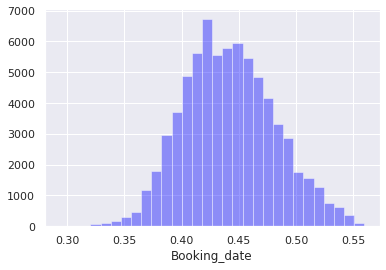

In [128]:
sns.distplot(df['Booking_date'], kde = False, bins=30, color='blue')

<AxesSubplot:xlabel='Required_Car_Parking'>

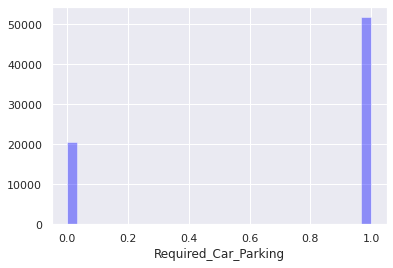

In [129]:
sns.distplot(df['Required_Car_Parking'], kde = False, bins=30, color='blue')

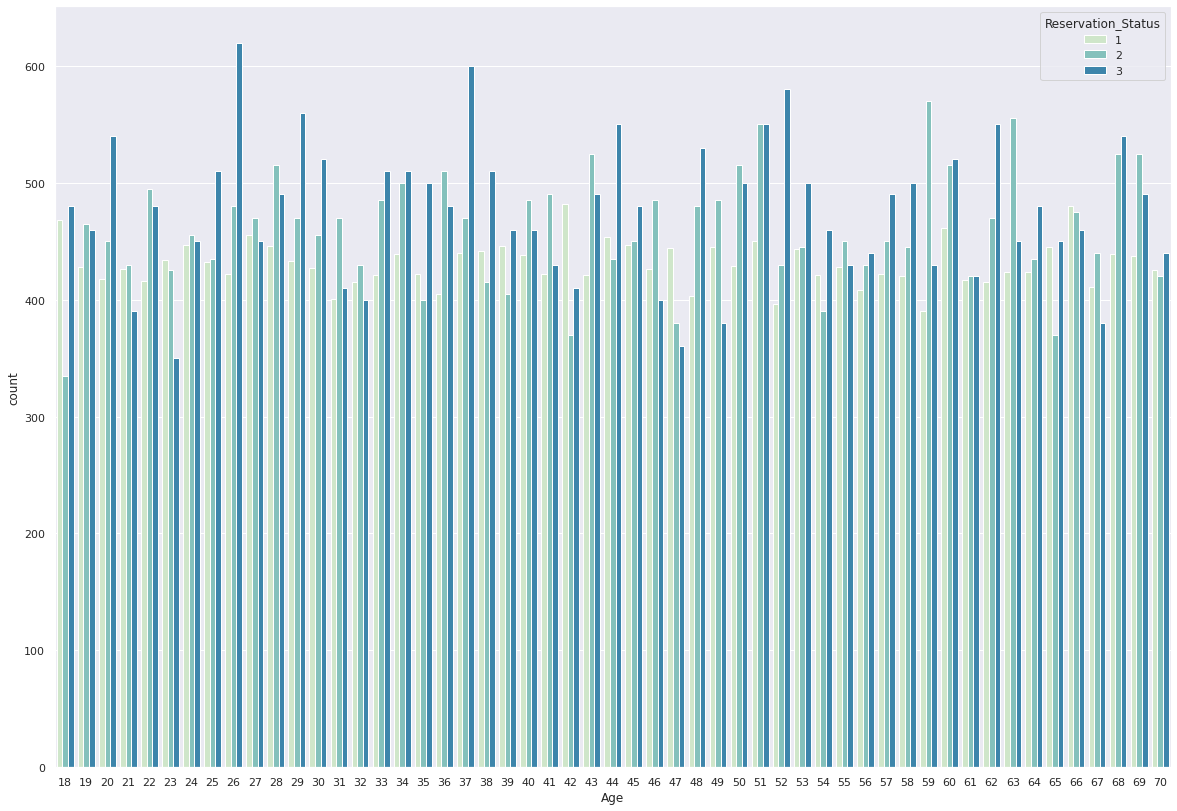

In [130]:
plt.figure(figsize=(20,14))
sns.countplot(x='Age',data = df, hue = 'Reservation_Status',palette='GnBu')
plt.show()

<AxesSubplot:xlabel='Use_Promotion', ylabel='Income'>

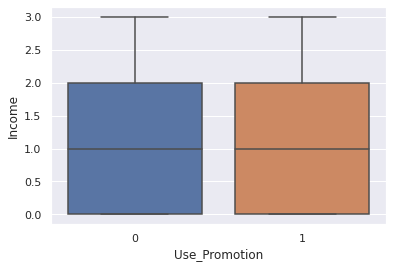

In [131]:
sns.boxplot(x="Use_Promotion", y="Income", data=df, whis=np.inf)
#sns.swarmplot(x="Use_Promotion", y="Income", data=df, color=".2")

Text(0, 0.5, 'Room_Rate')

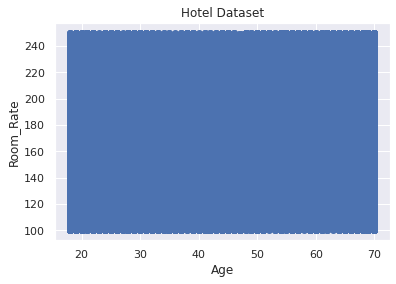

In [132]:
fig, ax = plt.subplots()

ax.scatter(df['Age'], df['Room_Rate'])

ax.set_title('Hotel Dataset')
ax.set_xlabel('Age')
ax.set_ylabel('Room_Rate')

<AxesSubplot:>

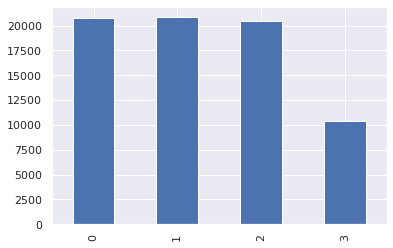

In [133]:
df['Income'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

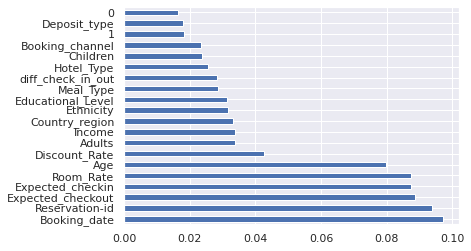

In [134]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
y = df.copy(deep=True)['Reservation_Status']
model = rf.fit(df.drop('Reservation_Status', axis=1),y)
importance = rf.feature_importances_
feat_importances_act = pd.Series(importance, index=df.drop('Reservation_Status', axis=1).columns)
feat_importances = feat_importances_act.nlargest(20)
feat_importances.plot(kind='barh')

<AxesSubplot:xlabel='Room_Rate'>

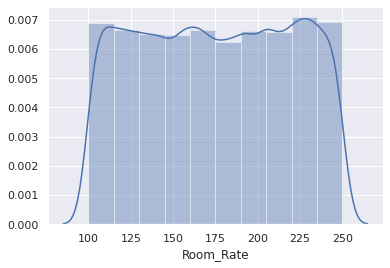

In [135]:
sns.distplot(df['Room_Rate'], bins=10, kde=True)

In [136]:
df=df.drop(["Reservation-id",'Expected_checkin', 'Expected_checkout', 
            'Booking_date', 'Required_Car_Parking', 'Age', 'Room_Rate', 'Use_Promotion', 'Previous_Cancellations'], axis =1)

validation_df=validation_df.drop(["Reservation-id",'Expected_checkin', 'Expected_checkout', 
            'Booking_date', 'Required_Car_Parking', 'Age', 'Room_Rate', 'Use_Promotion', 'Previous_Cancellations'], axis =1)

test_df=test_df.drop(["Reservation-id",'Expected_checkin', 'Expected_checkout', 
            'Booking_date', 'Required_Car_Parking', 'Age', 'Room_Rate', 'Use_Promotion', 'Previous_Cancellations'], axis =1)

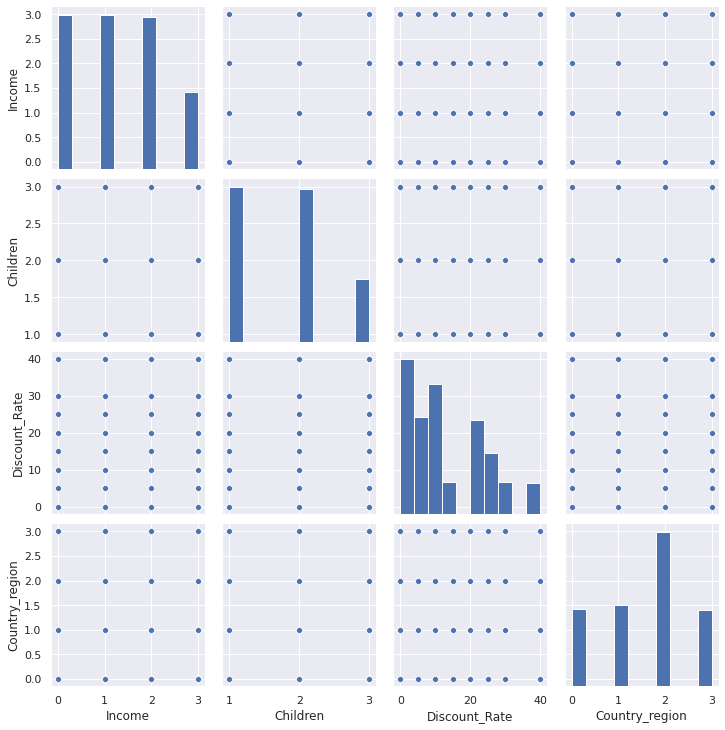

In [137]:
sns.pairplot(df[['Income', 'Children', 'Discount_Rate', 'Country_region']])

<AxesSubplot:>

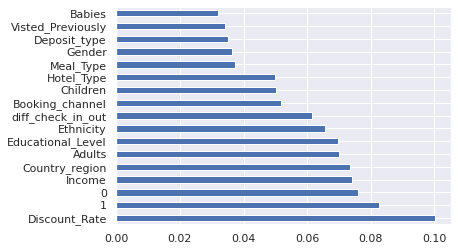

In [138]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
y = df.copy(deep=True)['Reservation_Status']
model = rf.fit(df.drop('Reservation_Status', axis=1),y)
importance = rf.feature_importances_
feat_importances_act = pd.Series(importance, index=df.drop('Reservation_Status', axis=1).columns)
feat_importances = feat_importances_act.nlargest(20)
feat_importances.plot(kind='barh')

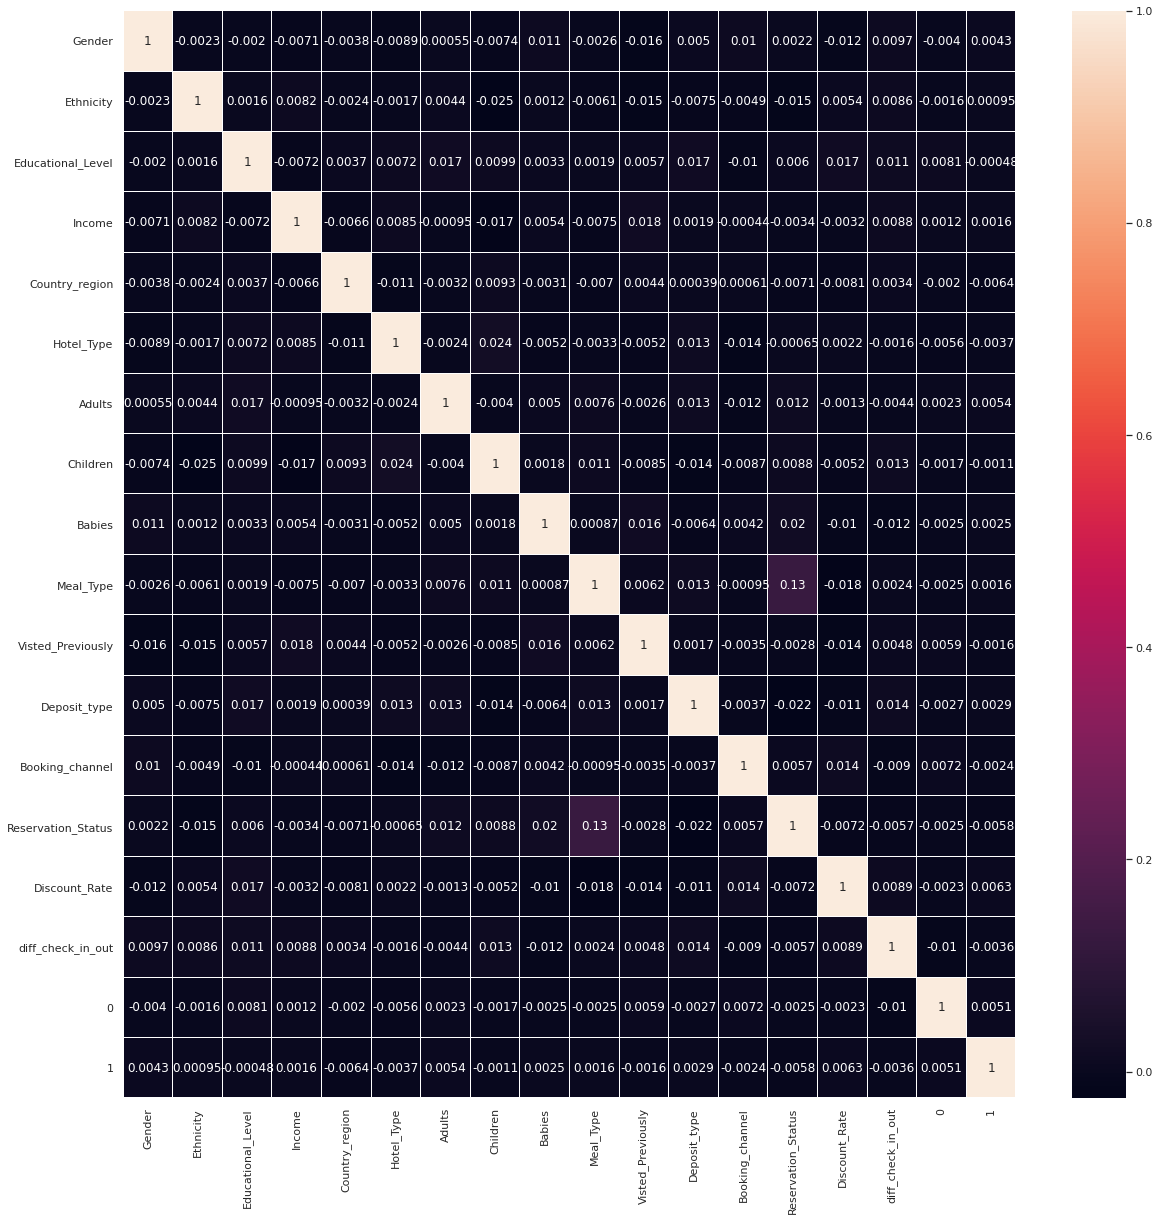

In [139]:
plt.figure(figsize=(20, 20))
plt.rcParams["axes.labelsize"] = 20
sns.set(font_scale=1.0)
sns.heatmap(df.corr(), annot = True ,linewidths=.1)
plt.show()

In [140]:
# prediction_var = ['Homepage','Aboutus','Aboutus_Duration','Contactus_Duration','PageValues','Month','Browser','Province','TrafficType','Weekend']

# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(df.drop('NEXT_MONTH_DEFAULT',1), df['NEXT_MONTH_DEFAULT'], test_size =.2, random_state=10)

# X_train = X_train[prediction_var]
# X_test = X_test[prediction_var]

In [141]:
X_test = validation_df.drop(['Reservation_Status'], axis =1)
X_train = df.drop(['Reservation_Status'], axis =1)
 
y_test = validation_df['Reservation_Status']
y_train = df['Reservation_Status'] 


### Classification

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVR
#from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score



classifiers=[['Logistic Regression :',LogisticRegression()],
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       #['Linear Regression :',LinearRegression()],
       ['Random Forest Classifier :',RandomForestClassifier()],
       #['XGB Classifier :',XGBClassifier()],
       ['SGD Classifier :',SGDClassifier()],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier()],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       #['Support Vector Classification SVC :',SVC(kernel='sigmoid')],
       #['Support Vector Classification SVR :',SVR()],
       #['Cat Boost Classifier :',CatBoostClassifier(iterations=1000)],
       #['Support Vector Classification LinearSVC :',LinearSVC()],
       #['Support Vector Classification LinearSVR :',LinearSVR()],
       ['MLP Classifier :',MLPClassifier()],
       #['Gaussian Process Classifier :',GaussianProcessClassifier()],
       #['RBF Classifier :',RBF()],
       #['GridSearchCV Classifier :',GridSearchCV()],
       ['QuadraticDiscriminantAnalysis :',QuadraticDiscriminantAnalysis()],
       ['Gaussian Naive Bayes :',GaussianNB()]]

In [143]:
cla_pred=[]
for name,model in classifiers:
    model=model
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    cla_pred.append(accuracy_score(y_test,predictions))
    print(name,accuracy_score(y_test,predictions))

random.seed(100)
rfmodel = XGBClassifier()

/home/rusiru/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression : 0.3401236813386686
Decision Tree Classification : 0.9181520552928337
Random Forest Classifier : 0.9883594034194253
SGD Classifier : 0.2346307748272099
Gradient Boosting Classification : 0.36013095671153145
Ada Boosting Classification : 0.3466715169152419
Extra Tree Classification : 0.9996362313568571
K-Neighbors Classification : 0.7406329574390688


/home/rusiru/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLP Classifier : 0.42779192433612223
QuadraticDiscriminantAnalysis : 0.3386686067660968
Gaussian Naive Bayes : 0.34267006184066934


## Hyper-parameter tuning 

In [144]:
'''#Hyperparameter tuning for XGB Classifier
# WARNING!!!....This may take a long time to process according to your processing power.
# if you really need ..uncomment the below and run!
random.seed(100)
from sklearn.model_selection import GridSearchCV
n_estimators = [33,34,35,40,50]
max_depth = [3,4,5,6,10]
learning_rate=[0.1,0.2,0.3] 
min_child_weight=[.7,.8,.9,1,1.1] 
scale_pos_weight=[.7,.8,.9,1] 
base_score=[0.6,0.7,0.8]
hyperparameters = dict(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate,min_child_weight=min_child_weight,scale_pos_weight=scale_pos_weight,base_score=base_score)
h_rfmodel = GridSearchCV(rfmodel, hyperparameters, cv=5, verbose=0)
best_logmodel=h_rfmodel.fit(X_train,y_train)
print('Best Estimators:', best_logmodel.best_estimator_.get_params()['n_estimators'])
print('Best Max Depth:', best_logmodel.best_estimator_.get_params()['max_depth'])
print('Best learning_rate:', best_logmodel.best_estimator_.get_params()['learning_rate'])
print('Best min_child_weight:', best_logmodel.best_estimator_.get_params()['min_child_weight'])
print('Best scale_pos_weight:', best_logmodel.best_estimator_.get_params()['scale_pos_weight'])
print('Best base_score:', best_logmodel.best_estimator_.get_params()['base_score'])'''

"#Hyperparameter tuning for XGB Classifier\n# WARNING!!!....This may take a long time to process according to your processing power.\n# if you really need ..uncomment the below and run!\nrandom.seed(100)\nfrom sklearn.model_selection import GridSearchCV\nn_estimators = [33,34,35,40,50]\nmax_depth = [3,4,5,6,10]\nlearning_rate=[0.1,0.2,0.3] \nmin_child_weight=[.7,.8,.9,1,1.1] \nscale_pos_weight=[.7,.8,.9,1] \nbase_score=[0.6,0.7,0.8]\nhyperparameters = dict(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate,min_child_weight=min_child_weight,scale_pos_weight=scale_pos_weight,base_score=base_score)\nh_rfmodel = GridSearchCV(rfmodel, hyperparameters, cv=5, verbose=0)\nbest_logmodel=h_rfmodel.fit(X_train,y_train)\nprint('Best Estimators:', best_logmodel.best_estimator_.get_params()['n_estimators'])\nprint('Best Max Depth:', best_logmodel.best_estimator_.get_params()['max_depth'])\nprint('Best learning_rate:', best_logmodel.best_estimator_.get_params()['learning_rate

## Validation

In [145]:
# model = XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=35, verbosity=1, n_jobs=1, gamma=0, min_child_weight=.77, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=.2, scale_pos_weight=.9, base_score=0.7, random_state=0, seed=None, missing=None)
model = MLPClassifier(hidden_layer_sizes=150, activation='logistic', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='invscaling', learning_rate_init=0.001)
# model = LogisticRegression()
# model = ExtraTreesClassifier()
# model = SVC(kernel='sigmoid')
# model = SGDClassifier()
# model = RandomForestClassifier()

model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test,predictions))

0.4103310294652601


/home/rusiru/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


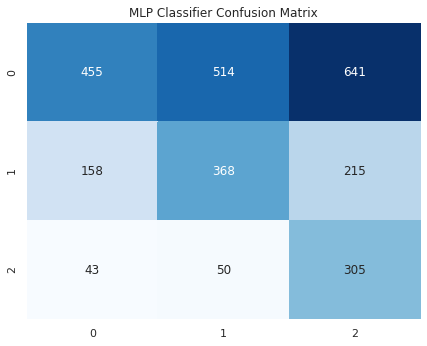

In [146]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test,predictions)

plt.figure(figsize=(24,12))

plt.subplot(2,3,1)
plt.title("MLP Classifier Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()

## Prediction




In [147]:
# X_train, X_test, y_train, y_test = train_test_split(df.drop('NEXT_MONTH_DEFAULT',1), df['NEXT_MONTH_DEFAULT'], test_size =.000001, random_state=10)

# model = XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=35, verbosity=1, n_jobs=1, gamma=0, min_child_weight=.77, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=.2, scale_pos_weight=.9, base_score=0.7, random_state=0, seed=None, missing=None)
# model = MLPClassifier(hidden_layer_sizes=150, activation='logistic', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='invscaling', learning_rate_init=0.001)
# model = LogisticRegression()
# model = ExtraTreesClassifier()
# model = SVC(kernel='sigmoid')
# model = SGDClassifier()
# model = RandomForestClassifier()

# model.fit(X_train, y_train)

my_prediction = model.predict(test_df)

# print(my_prediction)
print(len(my_prediction))

for i in my_prediction:
    print(i)

4318
2
1
1
3
2
3
2
3
1
3
2
1
1
3
1
3
1
1
1
3
1
3
3
3
2
3
1
3
1
1
1
1
2
1
3
3
2
1
3
2
1
2
2
3
2
2
3
1
3
1
3
1
3
3
1
1
1
2
1
1
3
1
1
1
2
1
1
1
3
3
1
1
3
2
3
3
1
1
1
1
1
2
1
3
3
2
3
1
3
1
2
3
1
3
3
1
1
1
3
1
1
1
3
1
2
3
2
1
1
3
3
1
1
1
1
1
3
1
3
1
1
2
3
1
1
2
1
1
1
1
1
2
2
1
1
3
1
1
3
1
1
1
1
1
3
1
1
1
3
3
1
1
3
3
1
3
1
3
3
3
1
2
1
1
3
1
2
1
1
2
1
2
3
2
3
1
1
3
2
3
3
3
1
3
1
1
1
3
3
1
1
1
1
1
2
3
1
1
3
1
2
2
1
2
1
2
3
1
1
1
1
3
2
1
3
1
3
3
2
1
3
1
3
2
1
2
2
3
1
1
1
2
1
1
3
1
2
3
1
1
1
1
3
2
1
1
3
2
1
1
1
3
1
2
2
1
2
3
1
1
2
3
1
1
3
1
3
3
2
3
2
3
3
1
3
3
1
2
3
2
3
3
1
1
2
1
1
3
1
1
3
2
1
1
2
3
2
1
1
3
2
3
1
2
2
3
1
3
3
1
1
1
1
2
2
3
2
3
2
1
3
3
3
1
2
1
1
2
1
1
1
3
3
3
1
1
3
3
2
1
1
3
1
1
3
3
3
3
1
1
1
3
2
3
1
2
1
3
2
3
2
1
3
3
3
3
1
3
3
3
1
3
1
1
1
2
3
1
3
2
2
3
3
2
3
3
1
3
1
1
1
1
1
1
2
2
1
1
3
2
3
3
3
1
3
2
1
1
3
2
3
3
1
2
2
2
3
3
3
3
2
2
2
3
2
3
3
3
2
2
3
3
2
3
2
3
1
1
1
1
1
3
1
3
1
3
2
3
1
1
1
3
2
2
2
2
2
2
3
3
1
1
1
1
3
1
3
1
1
1
1
3
3
1
1
1
2
3
1
3
1
1
2
3
2
2
1
2
2
3
3
3
2
3
3
1
1
3

In [148]:
ones, twos, threes, unwanted = 0, 0, 0, 0
for i in my_prediction:
    if(i==1):
        ones +=1
    elif(i==2):
        twos += 1
    elif(i==3):
        threes += 1
    else:
        unwanted += 1
        
print("No. of Ones     : ", ones)
print("No. of Twos     : ", twos)
print("No. of Threes   : ", threes)
print("No. of Unwanted : ", unwanted)

No. of Ones     :  2013
No. of Twos     :  957
No. of Threes   :  1348
No. of Unwanted :  0
